In [1]:
pip install evds

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import evds as ev

In [3]:
import evds as ev

In [4]:
with open("EVDS.txt") as dosya:
  api = dosya.read()

In [5]:
evds = ev.evdsAPI(api)

In [6]:
tufe = evds.get_data(["TP.FG.J0"], startdate="01-01-2003", enddate="31-12-2024")
print(tufe)

       Tarih  TP_FG_J0
0     2003-1     94.77
1     2003-2     96.23
2     2003-3     98.12
3     2003-4     99.09
4     2003-5    100.04
..       ...       ...
259   2024-8   2453.34
260   2024-9   2526.16
261  2024-10   2598.91
262  2024-11   2657.23
263  2024-12   2684.55

[264 rows x 2 columns]


In [7]:
tufe["Aylık Enf"]=round(tufe["TP_FG_J0"].pct_change()*100,2) # Aylık bazda TÜFE ye göre enflasyon
print(tufe) # Bir önceki aya göre değer aldığı için ilk veri NaN değer çıkacaktır

       Tarih  TP_FG_J0  Aylık Enf
0     2003-1     94.77        NaN
1     2003-2     96.23       1.54
2     2003-3     98.12       1.96
3     2003-4     99.09       0.99
4     2003-5    100.04       0.96
..       ...       ...        ...
259   2024-8   2453.34       2.47
260   2024-9   2526.16       2.97
261  2024-10   2598.91       2.88
262  2024-11   2657.23       2.24
263  2024-12   2684.55       1.03

[264 rows x 3 columns]


In [8]:
tufe.dropna(axis=0, inplace=True)

In [9]:
tufe

,Tarih,TP_FG_J0,Aylık Enf
1,2003-2,96.23,1.54
2,2003-3,98.12,1.96
3,2003-4,99.09,0.99
4,2003-5,100.04,0.96
5,2003-6,100.12,0.08
...,...,...,...
259,2024-8,2453.34,2.47
260,2024-9,2526.16,2.97
261,2024-10,2598.91,2.88
262,2024-11,2657.23,2.24


In [10]:
ufe = evds.get_data(["TP.TUFE1YI.T1"], startdate="01-01-2003", enddate="31-12-2024")

In [11]:
ufe

,Tarih,TP_TUFE1YI_T1
0,2003-1,94.318481
1,2003-2,97.282867
2,2003-3,100.400298
3,2003-4,102.167899
4,2003-5,101.533658
...,...,...
259,2024-8,3610.510000
260,2024-9,3659.840000
261,2024-10,3707.100000
262,2024-11,3731.430000


In [12]:
ufe["ÜFE Aylık Enf"]=round(ufe["TP_TUFE1YI_T1"].pct_change()*100,2) # Aylık bazda ÜFE ye göre enflasyon
print(ufe)
ufe.dropna(axis=0, inplace=True)
ufe

       Tarih  TP_TUFE1YI_T1  ÜFE Aylık Enf
0     2003-1      94.318481            NaN
1     2003-2      97.282867           3.14
2     2003-3     100.400298           3.20
3     2003-4     102.167899           1.76
4     2003-5     101.533658          -0.62
..       ...            ...            ...
259   2024-8    3610.510000           1.68
260   2024-9    3659.840000           1.37
261  2024-10    3707.100000           1.29
262  2024-11    3731.430000           0.66
263  2024-12    3746.520000           0.40

[264 rows x 3 columns]


,Tarih,TP_TUFE1YI_T1,ÜFE Aylık Enf
1,2003-2,97.282867,3.14
2,2003-3,100.400298,3.20
3,2003-4,102.167899,1.76
4,2003-5,101.533658,-0.62
5,2003-6,99.578542,-1.93
...,...,...,...
259,2024-8,3610.510000,1.68
260,2024-9,3659.840000,1.37
261,2024-10,3707.100000,1.29
262,2024-11,3731.430000,0.66


In [13]:
lst = []
for i in range(1,13):
  kor = tufe['Aylık Enf'].corr(ufe["ÜFE Aylık Enf"].shift(i))
  lst.append(kor)
best_i = lst.index(max(lst)) + 1
print("En büyük korelasyon:", max(lst))
print("Shift değeri:", best_i)

En büyük korelasyon: 0.6980863347345477
Shift değeri: 1


TÜFE ile ÜFE arasındaki ilişkiyi test ediyoruz.

ÜFE verisini 1–12 ay öteleyip korelasyonunu hesaplıyoruz.

Böylece ÜFE’nin TÜFE’den kaç ay önce hareket ettiğini (öncü gösterge olup olmadığını) buluyoruz.


In [14]:
lst2 = []
for i in range(1,13):
  kor = tufe['Aylık Enf'].corr(ufe["ÜFE Aylık Enf"].rolling(window=i).mean())
  lst2.append(kor)
best_i2 = lst2.index(max(lst2)) + 1
print("En büyük korelasyon:", max(lst2))
print("Shift değeri:", best_i2)

En büyük korelasyon: 0.8037470735312319
Shift değeri: 2


ÜFE’nin farklı uzunluklarda hareketli ortalaması ile TÜFE arasındaki korelasyonu hesaplıyoruz.

Böylece hangi pencere (kaç aylık ortalama) TÜFE ile en güçlü ilişkiyi gösteriyor onu buluyoruz.


In [15]:
ufe["ÜFE Aylık Enflasyon 2HO"] = round(ufe["ÜFE Aylık Enf"].rolling(window=2).mean(),2)
ufe

,Tarih,TP_TUFE1YI_T1,ÜFE Aylık Enf,ÜFE Aylık Enflasyon 2HO
1,2003-2,97.282867,3.14,NaN
2,2003-3,100.400298,3.20,3.17
3,2003-4,102.167899,1.76,2.48
4,2003-5,101.533658,-0.62,0.57
5,2003-6,99.578542,-1.93,-1.27
...,...,...,...,...
259,2024-8,3610.510000,1.68,1.81
260,2024-9,3659.840000,1.37,1.53
261,2024-10,3707.100000,1.29,1.33
262,2024-11,3731.430000,0.66,0.98


"ÜFE Aylık Enflasyon 2HO": ÜFE’nin 2 aylık hareketli ortalaması, TÜFE ile en yüksek korelasyonu verdiği için modele girdi olarak eklendi.


In [16]:
def kor(data):
  df = pd.DataFrame(columns=["Yöntem","Gecikme","Korelasyon"])
  for i in range(1,13):
    for j in ["Gecikme","HO"]:
      if j == "Gecikme":
        kor = round(tufe['Aylık Enf'].corr(data.shift(i)),2)
        df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)
      else:
        kor = round(tufe['Aylık Enf'].corr(data.rolling(window=i).mean()),2)
        df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)
  return print(df.sort_values(by="Korelasyon",ascending=False))

Bu fonksiyon, verilen serinin TÜFE ile korelasyonunu hesaplar.

Hem gecikme (lag) hem de hareketli ortalama (HO) yöntemlerini 1–12 ay arası dener.

Sonuçları tablo halinde göstererek hangi yöntem ve sürenin en güçlü ilişkiyi verdiğini bulmamızı sağlar.


In [17]:
kor(ufe["ÜFE Aylık Enf"])

     Yöntem Gecikme  Korelasyon
3        HO       2        0.80
1        HO       1        0.79
5        HO       3        0.75
0   Gecikme       1        0.70
7        HO       4        0.70
9        HO       5        0.67
11       HO       6        0.65
15       HO       8        0.64
13       HO       7        0.64
17       HO       9        0.63
21       HO      11        0.62
19       HO      10        0.62
23       HO      12        0.61
2   Gecikme       2        0.45
10  Gecikme       6        0.38
4   Gecikme       3        0.37
12  Gecikme       7        0.36
6   Gecikme       4        0.35
18  Gecikme      10        0.34
16  Gecikme       9        0.34
14  Gecikme       8        0.33
8   Gecikme       5        0.32
22  Gecikme      12        0.31
20  Gecikme      11        0.30


/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)


In [18]:
bvec_endeks = evds.get_data(["TP.FE.OKTG03","TP.FE.OKTG04"], startdate="01-01-2003", enddate="31-12-2024")

In [19]:
bvec_endeks
# B ve C endeksleri, gıda ve enerji gibi oynak kalemler hariç tutulduğu için
# kalıcı fiyat eğilimlerini (çekirdek enflasyonu) görmek amacıyla alındı.

,Tarih,TP_FE_OKTG03,TP_FE_OKTG04
0,2003-1,94.46,94.47
1,2003-2,95.23,95.24
2,2003-3,96.12,96.01
3,2003-4,97.68,97.49
4,2003-5,98.97,98.80
...,...,...,...
259,2024-8,2111.82,1937.70
260,2024-9,2179.86,2006.94
261,2024-10,2238.55,2062.95
262,2024-11,2273.05,2094.59


In [20]:
bvec_endeks["B Enflasyon"] = round(bvec_endeks["TP_FE_OKTG03"].pct_change()*100,2)
bvec_endeks["C Enflasyon"] = round(bvec_endeks["TP_FE_OKTG04"].pct_change()*100,2)
bvec_endeks["B ve C Ort"] = (bvec_endeks["B Enflasyon"]+bvec_endeks["C Enflasyon"])/2
bvec_endeks.dropna(axis=0, inplace=True)

In [21]:
bvec_endeks

,Tarih,TP_FE_OKTG03,TP_FE_OKTG04,B Enflasyon,C Enflasyon,B ve C Ort
1,2003-2,95.23,95.24,0.82,0.82,0.820
2,2003-3,96.12,96.01,0.93,0.81,0.870
3,2003-4,97.68,97.49,1.62,1.54,1.580
4,2003-5,98.97,98.80,1.32,1.34,1.330
5,2003-6,99.98,99.87,1.02,1.08,1.050
...,...,...,...,...,...,...
259,2024-8,2111.82,1937.70,2.88,2.99,2.935
260,2024-9,2179.86,2006.94,3.22,3.57,3.395
261,2024-10,2238.55,2062.95,2.69,2.79,2.740
262,2024-11,2273.05,2094.59,1.54,1.53,1.535


In [22]:
kor(bvec_endeks["B Enflasyon"])
kor(bvec_endeks["C Enflasyon"]) # HO da 1 değerini kullanamadığımız için 2 yi almak durumundayız.
kor(bvec_endeks["B ve C Ort"])

/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)
/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)
/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude e

     Yöntem Gecikme  Korelasyon
1        HO       1        0.91
3        HO       2        0.85
5        HO       3        0.77
7        HO       4        0.73
13       HO       7        0.71
9        HO       5        0.71
11       HO       6        0.70
15       HO       8        0.69
17       HO       9        0.66
19       HO      10        0.64
0   Gecikme       1        0.64
21       HO      11        0.63
23       HO      12        0.62
10  Gecikme       6        0.51
8   Gecikme       5        0.43
2   Gecikme       2        0.41
4   Gecikme       3        0.41
6   Gecikme       4        0.40
22  Gecikme      12        0.39
12  Gecikme       7        0.37
20  Gecikme      11        0.32
16  Gecikme       9        0.30
18  Gecikme      10        0.29
14  Gecikme       8        0.27
     Yöntem Gecikme  Korelasyon
1        HO       1        0.88
3        HO       2        0.83
5        HO       3        0.75
7        HO       4        0.72
13       HO       7        0.71
9       

In [23]:
bvec_endeks["B ve C Ort 2HO"] = bvec_endeks["B ve C Ort"].rolling(window=2).mean()
# Korealasyon farkı çok az olduğu için tek değişken olması amacıyla alınmıştır.

In [24]:
itoenf = evds.get_data(["TP.FG.C01"], startdate="01-01-2003", enddate="31-12-2024",frequency=5)
itoenf

,Tarih,TP_FG_C01
0,2003-1,3.332876e+07
1,2003-2,3.408279e+07
2,2003-3,3.469007e+07
3,2003-4,3.530215e+07
4,2003-5,3.541630e+07
...,...,...
259,2024-8,1.087529e+09
260,2024-9,1.138266e+09
261,2024-10,1.139987e+09
262,2024-11,1.170582e+09


In [25]:
itoenf["Aylık İTO Enflasyon"] = round(itoenf["TP_FG_C01"].pct_change()*100,2)
itoenf.dropna(axis=0, inplace=True)
itoenf

,Tarih,TP_FG_C01,Aylık İTO Enflasyon
1,2003-2,3.408279e+07,2.26
2,2003-3,3.469007e+07,1.78
3,2003-4,3.530215e+07,1.76
4,2003-5,3.541630e+07,0.32
5,2003-6,3.583192e+07,1.17
...,...,...,...
259,2024-8,1.087529e+09,0.98
260,2024-9,1.138266e+09,4.67
261,2024-10,1.139987e+09,0.15
262,2024-11,1.170582e+09,2.68


In [26]:
kor(itoenf["Aylık İTO Enflasyon"])

     Yöntem Gecikme  Korelasyon
3        HO       2        0.81
1        HO       1        0.75
5        HO       3        0.75
7        HO       4        0.73
0   Gecikme       1        0.70
9        HO       5        0.70
11       HO       6        0.69
13       HO       7        0.68
15       HO       8        0.67
17       HO       9        0.66
21       HO      11        0.64
19       HO      10        0.64
23       HO      12        0.63
2   Gecikme       2        0.49
4   Gecikme       3        0.48
10  Gecikme       6        0.45
8   Gecikme       5        0.44
6   Gecikme       4        0.43
12  Gecikme       7        0.43
22  Gecikme      12        0.39
16  Gecikme       9        0.38
14  Gecikme       8        0.37
18  Gecikme      10        0.37
20  Gecikme      11        0.34


/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)


In [27]:
itoenf["Aylık İTO Enflasyon 2HO"] = itoenf["Aylık İTO Enflasyon"].rolling(window=2).mean()

In [28]:
usdveur = evds.get_data(["TP.DK.USD.A.YTL","TP.DK.EUR.A.YTL"], startdate="01-01-2003", enddate="31-12-2024",frequency=5)
usdveur["Dolar Euro Ort"] = (usdveur["TP_DK_USD_A_YTL"]+usdveur["TP_DK_EUR_A_YTL"])/2
usdveur.dropna(axis=0, inplace=True)
usdveur

,Tarih,TP_DK_USD_A_YTL,TP_DK_EUR_A_YTL,Dolar Euro Ort
0,2003-1,1.655836,1.756309,1.706072
1,2003-2,1.623231,1.749927,1.686579
2,2003-3,1.655387,1.788123,1.721755
3,2003-4,1.627196,1.763742,1.695469
4,2003-5,1.490377,1.715888,1.603133
...,...,...,...,...
259,2024-8,33.560781,36.906657,35.233719
260,2024-9,33.969271,37.715176,35.842224
261,2024-10,34.171018,37.333555,35.752286
262,2024-11,34.364714,36.572629,35.468671


In [29]:
kor(usdveur["Dolar Euro Ort"])
kor(usdveur['TP_DK_EUR_A_YTL'])
kor(usdveur['TP_DK_USD_A_YTL']) # Korelasyon arasında fark olmadığı için USD almayı tercih ettim

/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)
/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)
/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude e

     Yöntem Gecikme  Korelasyon
1        HO       1        0.57
3        HO       2        0.56
0   Gecikme       1        0.55
5        HO       3        0.55
7        HO       4        0.54
9        HO       5        0.54
11       HO       6        0.53
2   Gecikme       2        0.53
13       HO       7        0.53
21       HO      11        0.52
19       HO      10        0.52
15       HO       8        0.52
17       HO       9        0.52
4   Gecikme       3        0.51
6   Gecikme       4        0.51
23       HO      12        0.51
22  Gecikme      12        0.50
12  Gecikme       7        0.50
8   Gecikme       5        0.50
10  Gecikme       6        0.50
14  Gecikme       8        0.49
16  Gecikme       9        0.49
18  Gecikme      10        0.49
20  Gecikme      11        0.49
     Yöntem Gecikme  Korelasyon
1        HO       1        0.57
3        HO       2        0.56
0   Gecikme       1        0.55
5        HO       3        0.55
7        HO       4        0.54
9       

In [30]:
usd = usdveur = evds.get_data(["TP.DK.USD.A.YTL"], startdate="01-01-2003", enddate="31-12-2024",frequency=5)
usd["Dolar 2 HO"] = usd["TP_DK_USD_A_YTL"].rolling(window=2).mean()
usd

,Tarih,TP_DK_USD_A_YTL,Dolar 2 HO
0,2003-1,1.655836,NaN
1,2003-2,1.623231,1.639533
2,2003-3,1.655387,1.639309
3,2003-4,1.627196,1.641292
4,2003-5,1.490377,1.558787
...,...,...,...
259,2024-8,33.560781,33.198054
260,2024-9,33.969271,33.765026
261,2024-10,34.171018,34.070145
262,2024-11,34.364714,34.267866


In [31]:
brentpetrol = evds.get_data(["TP.BRENTPETROL.EUBP"], startdate="01-01-2003", enddate="31-12-2024",frequency=5)
brentpetrol["Brent Petrol TL"] = brentpetrol["TP_BRENTPETROL_EUBP"]*usd["TP_DK_USD_A_YTL"]
# Veri dolar üzerinden geleceği için kur ile çarpım yaptım
brentpetrol

,Tarih,TP_BRENTPETROL_EUBP,Brent Petrol TL
0,2003-1,31.57,52.274732
1,2003-2,34.00,55.189850
2,2003-3,28.05,46.433597
3,2003-4,23.60,38.401837
4,2003-5,26.58,39.614232
...,...,...,...
259,2024-8,80.20,2691.574632
260,2024-9,72.35,2457.676788
261,2024-10,73.25,2503.027082
262,2024-11,74.16,2548.487211


In [32]:
kor(brentpetrol["Brent Petrol TL"])

     Yöntem Gecikme  Korelasyon
1        HO       1        0.60
3        HO       2        0.58
0   Gecikme       1        0.56
5        HO       3        0.56
7        HO       4        0.55
9        HO       5        0.54
11       HO       6        0.54
13       HO       7        0.53
19       HO      10        0.52
17       HO       9        0.52
2   Gecikme       2        0.52
15       HO       8        0.52
21       HO      11        0.51
4   Gecikme       3        0.51
23       HO      12        0.51
6   Gecikme       4        0.50
8   Gecikme       5        0.49
10  Gecikme       6        0.49
12  Gecikme       7        0.48
14  Gecikme       8        0.47
22  Gecikme      12        0.47
16  Gecikme       9        0.46
18  Gecikme      10        0.46
20  Gecikme      11        0.46


/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)


In [33]:
brentpetrol["Brent Petrol 2HO"] = brentpetrol['Brent Petrol TL'].rolling(window=2).mean()
brentpetrol.dropna(axis=0, inplace=True)
brentpetrol

,Tarih,TP_BRENTPETROL_EUBP,Brent Petrol TL,Brent Petrol 2HO
1,2003-2,34.00,55.189850,53.732291
2,2003-3,28.05,46.433597,50.811724
3,2003-4,23.60,38.401837,42.417717
4,2003-5,26.58,39.614232,39.008034
5,2003-6,28.88,40.983598,40.298915
...,...,...,...,...
259,2024-8,80.20,2691.574632,2682.020960
260,2024-9,72.35,2457.676788,2574.625710
261,2024-10,73.25,2503.027082,2480.351935
262,2024-11,74.16,2548.487211,2525.757147


In [34]:
kredi = evds.get_data(["TP.KTFTUK"], startdate="01-01-2003", enddate="31-12-2024",frequency=5)
kredi

,Tarih,TP_KTFTUK
0,2003-1,44.6880
1,2003-2,46.1150
2,2003-3,49.3075
3,2003-4,54.4225
4,2003-5,51.1000
...,...,...
259,2024-8,70.9700
260,2024-9,68.6175
261,2024-10,67.0275
262,2024-11,66.0380


In [35]:
kor(kredi["TP_KTFTUK"]) # Düşük korelasyon kaynaklı veri setine almadım

     Yöntem Gecikme  Korelasyon
1        HO       1        0.39
3        HO       2        0.37
0   Gecikme       1        0.35
5        HO       3        0.35
7        HO       4        0.34
9        HO       5        0.33
11       HO       6        0.32
15       HO       8        0.32
17       HO       9        0.32
13       HO       7        0.32
2   Gecikme       2        0.31
21       HO      11        0.31
19       HO      10        0.31
23       HO      12        0.31
4   Gecikme       3        0.29
6   Gecikme       4        0.26
8   Gecikme       5        0.24
10  Gecikme       6        0.24
12  Gecikme       7        0.23
14  Gecikme       8        0.21
16  Gecikme       9        0.20
18  Gecikme      10        0.19
20  Gecikme      11        0.19
22  Gecikme      12        0.19


/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)


In [62]:
altin = evds.get_data(["TP.MK.KUL.YTL"], startdate="01-01-2003", enddate="31-12-2024",frequency=5)
altin

,Tarih,TP_MK_KUL_YTL
0,2003-1,19.9500
1,2003-2,18.8000
2,2003-3,18.3625
3,2003-4,17.3125
4,2003-5,16.7400
...,...,...
259,2024-8,2731.3400
260,2024-9,2907.1200
261,2024-10,3090.7200
262,2024-11,3076.7300


In [63]:
kor(altin["TP_MK_KUL_YTL"])

     Yöntem Gecikme  Korelasyon
1        HO       1        0.51
3        HO       2        0.51
0   Gecikme       1        0.50
5        HO       3        0.50
7        HO       4        0.50
2   Gecikme       2        0.49
11       HO       6        0.49
9        HO       5        0.49
13       HO       7        0.49
22  Gecikme      12        0.49
6   Gecikme       4        0.48
4   Gecikme       3        0.48
19       HO      10        0.48
20  Gecikme      11        0.48
17       HO       9        0.48
15       HO       8        0.48
21       HO      11        0.48
23       HO      12        0.48
8   Gecikme       5        0.47
10  Gecikme       6        0.47
14  Gecikme       8        0.47
12  Gecikme       7        0.47
18  Gecikme      10        0.47
16  Gecikme       9        0.47


/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)


In [64]:
altin = evds.get_data(["TP.MK.KUL.YTL"], startdate="01-01-2003", enddate="31-12-2024",frequency=5)
altin["Altın Aylık Enf"] = round(altin["TP_MK_KUL_YTL"].pct_change()*100,2)
altin.dropna(axis=0, inplace=True)
altin

,Tarih,TP_MK_KUL_YTL,Altın Aylık Enf
1,2003-2,18.8000,-5.76
2,2003-3,18.3625,-2.33
3,2003-4,17.3125,-5.72
4,2003-5,16.7400,-3.31
5,2003-6,15.6625,-6.44
...,...,...,...
259,2024-8,2731.3400,6.58
260,2024-9,2907.1200,6.44
261,2024-10,3090.7200,6.32
262,2024-11,3076.7300,-0.45


In [65]:
kor(altin["Altın Aylık Enf"])

     Yöntem Gecikme  Korelasyon
17       HO       9        0.55
7        HO       4        0.54
9        HO       5        0.54
19       HO      10        0.54
11       HO       6        0.54
5        HO       3        0.53
21       HO      11        0.53
15       HO       8        0.53
23       HO      12        0.52
13       HO       7        0.52
3        HO       2        0.47
0   Gecikme       1        0.42
1        HO       1        0.32
2   Gecikme       2        0.31
4   Gecikme       3        0.19
14  Gecikme       8        0.18
6   Gecikme       4        0.17
12  Gecikme       7        0.15
8   Gecikme       5        0.12
10  Gecikme       6        0.09
16  Gecikme       9        0.09
20  Gecikme      11        0.06
18  Gecikme      10        0.05
22  Gecikme      12        0.05


/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)


In [66]:
asgari = pd.read_excel("Asgari Ücret.xlsx")

In [67]:
asgari

,Tarih,Net Ucret
0,2003-01-01,306.0
1,2003-02-01,306.0
2,2003-03-01,306.0
3,2003-04-01,306.0
4,2003-05-01,306.0
...,...,...
259,2024-08-01,200002.0
260,2024-09-01,200002.0
261,2024-10-01,200002.0
262,2024-11-01,200002.0


In [68]:
altin["Altın Alım Gucu"] = asgari["Net Ucret"]/altin['TP_MK_KUL_YTL']
altin

,Tarih,TP_MK_KUL_YTL,Altın Aylık Enf,Altın Alım Gucu
1,2003-2,18.8000,-5.76,16.276596
2,2003-3,18.3625,-2.33,16.664398
3,2003-4,17.3125,-5.72,17.675090
4,2003-5,16.7400,-3.31,18.279570
5,2003-6,15.6625,-6.44,19.537111
...,...,...,...,...
259,2024-8,2731.3400,6.58,73.224864
260,2024-9,2907.1200,6.44,68.797298
261,2024-10,3090.7200,6.32,64.710488
262,2024-11,3076.7300,-0.45,65.004729


In [69]:
kor(altin["Altın Alım Gucu"])

     Yöntem Gecikme  Korelasyon
1        HO       1        0.11
3        HO       2        0.08
5        HO       3        0.06
7        HO       4        0.05
0   Gecikme       1        0.04
9        HO       5        0.03
11       HO       6        0.02
2   Gecikme       2        0.02
13       HO       7        0.01
4   Gecikme       3        0.00
15       HO       8        0.00
17       HO       9       -0.01
6   Gecikme       4       -0.02
19       HO      10       -0.02
21       HO      11       -0.04
10  Gecikme       6       -0.05
8   Gecikme       5       -0.05
23       HO      12       -0.05
12  Gecikme       7       -0.08
14  Gecikme       8       -0.11
16  Gecikme       9       -0.14
18  Gecikme      10       -0.20
20  Gecikme      11       -0.27
22  Gecikme      12       -0.37


/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)


In [70]:
altin["Altın Aylık Enf 9HO"] = altin["Altın Aylık Enf"].rolling(window=9).mean()
altin

,Tarih,TP_MK_KUL_YTL,Altın Aylık Enf,Altın Alım Gucu,Altın Aylık Enf 9HO
1,2003-2,18.8000,-5.76,16.276596,NaN
2,2003-3,18.3625,-2.33,16.664398,NaN
3,2003-4,17.3125,-5.72,17.675090,NaN
4,2003-5,16.7400,-3.31,18.279570,NaN
5,2003-6,15.6625,-6.44,19.537111,NaN
...,...,...,...,...,...
259,2024-8,2731.3400,6.58,73.224864,4.411111
260,2024-9,2907.1200,6.44,68.797298,4.440000
261,2024-10,3090.7200,6.32,64.710488,4.665556
262,2024-11,3076.7300,-0.45,65.004729,4.530000


In [47]:
paraarz = evds.get_data(["TP.PR.ARZ01","TP.PR.ARZ13","TP.PR.ARZ22"],startdate="01-01-2003",enddate="31-12-2024", frequency=5)
paraarz

,Tarih,TP_PR_ARZ01,TP_PR_ARZ13,TP_PR_ARZ22
0,2003-1,NaN,NaN,NaN
1,2003-2,NaN,NaN,NaN
2,2003-3,NaN,NaN,NaN
3,2003-4,NaN,NaN,NaN
4,2003-5,NaN,NaN,NaN
...,...,...,...,...
259,2024-8,5.982992e+09,1.626051e+10,1.766980e+10
260,2024-9,6.105518e+09,1.655369e+10,1.813362e+10
261,2024-10,6.087428e+09,1.666771e+10,1.842028e+10
262,2024-11,6.089273e+09,1.695648e+10,1.879903e+10


In [48]:
print(paraarz.isnull().sum()/len(paraarz))

Tarih          0.000000
TP_PR_ARZ01    0.132576
TP_PR_ARZ13    0.132576
TP_PR_ARZ22    0.132576
dtype: float64


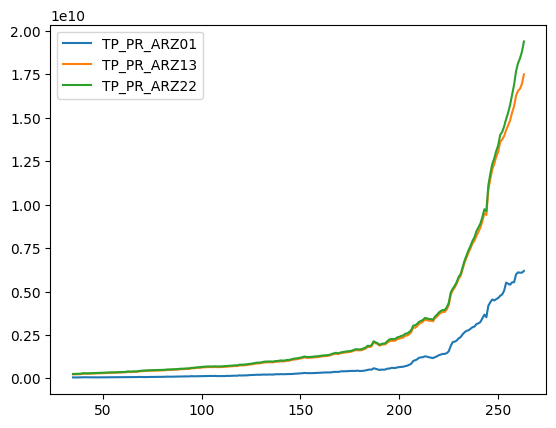

In [49]:
paraarz.plot()
plt.show()

In [50]:
paraarz["M1 Değişim"] = round(paraarz["TP_PR_ARZ01"].pct_change()*100,2)
paraarz["M2 Değişim"] = round(paraarz["TP_PR_ARZ13"].pct_change()*100,2)
paraarz["M3 Değişim"] = round(paraarz["TP_PR_ARZ22"].pct_change()*100,2)

In [51]:
print(paraarz[36:])
print(tufe[35:])

       Tarih   TP_PR_ARZ01   TP_PR_ARZ13   TP_PR_ARZ22  M1 Değişim  \
36    2006-1  5.788553e+07  2.373534e+08  2.605798e+08       -6.54   
37    2006-2  6.049326e+07  2.423895e+08  2.663248e+08        4.50   
38    2006-3  5.838769e+07  2.494857e+08  2.731552e+08       -3.48   
39    2006-4  6.041584e+07  2.521919e+08  2.767716e+08        3.47   
40    2006-5  6.700440e+07  2.751947e+08  3.025340e+08       10.91   
..       ...           ...           ...           ...         ...   
259   2024-8  5.982992e+09  1.626051e+10  1.766980e+10        8.05   
260   2024-9  6.105518e+09  1.655369e+10  1.813362e+10        2.05   
261  2024-10  6.087428e+09  1.666771e+10  1.842028e+10       -0.30   
262  2024-11  6.089273e+09  1.695648e+10  1.879903e+10        0.03   
263  2024-12  6.186986e+09  1.750066e+10  1.939125e+10        1.60   

     M2 Değişim  M3 Değişim  
36        -0.25       -0.01  
37         2.12        2.20  
38         2.93        2.56  
39         1.08        1.32  
40       

In [52]:
print(tufe["Aylık Enf"][35:].corr(paraarz['M1 Değişim'][36:]))
print(tufe["Aylık Enf"][35:].corr(paraarz['M2 Değişim'][36:]))
print(tufe["Aylık Enf"][35:].corr(paraarz['M3 Değişim'][36:]))

0.12508738393783048
0.2875828270009691
0.29563235932086396


In [53]:
paraarz.interpolate(method="linear", limit_direction="backward", inplace=True)
paraarz

/tmp/ipython-input-3069007727.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  paraarz.interpolate(method="linear", limit_direction="backward", inplace=True)


,Tarih,TP_PR_ARZ01,TP_PR_ARZ13,TP_PR_ARZ22,M1 Değişim,M2 Değişim,M3 Değişim
0,2003-1,6.193660e+07,2.379490e+08,2.606141e+08,-6.54,-0.25,-0.01
1,2003-2,6.193660e+07,2.379490e+08,2.606141e+08,-6.54,-0.25,-0.01
2,2003-3,6.193660e+07,2.379490e+08,2.606141e+08,-6.54,-0.25,-0.01
3,2003-4,6.193660e+07,2.379490e+08,2.606141e+08,-6.54,-0.25,-0.01
4,2003-5,6.193660e+07,2.379490e+08,2.606141e+08,-6.54,-0.25,-0.01
...,...,...,...,...,...,...,...
259,2024-8,5.982992e+09,1.626051e+10,1.766980e+10,8.05,3.84,4.66
260,2024-9,6.105518e+09,1.655369e+10,1.813362e+10,2.05,1.80,2.62
261,2024-10,6.087428e+09,1.666771e+10,1.842028e+10,-0.30,0.69,1.58
262,2024-11,6.089273e+09,1.695648e+10,1.879903e+10,0.03,1.73,2.06


In [54]:
print(tufe["Aylık Enf"].corr(paraarz['M1 Değişim']))
print(tufe["Aylık Enf"].corr(paraarz['M2 Değişim']))
print(tufe["Aylık Enf"].corr(paraarz['M3 Değişim']))

0.17183151073124864
0.307429697422559
0.31398718165132444


Veri setinde yaklaşık %13 oranında eksik değer vardı. Bu eksik değerleri istatistiksel yöntemlerle doldurdum. Doldurma işlemi sonrasında korelasyonları tekrar kontrol ettim ve anlamlı bir değişim olmadığını gördüm. Böylece hem veri seti bütün hale geldi hem de analiz sonuçlarının güvenilirliği korundu.

In [55]:
kor(paraarz['M1 Değişim'])
kor(paraarz['M2 Değişim'])
kor(paraarz['M3 Değişim'])

     Yöntem Gecikme  Korelasyon
0   Gecikme       1        0.41
5        HO       3        0.38
11       HO       6        0.37
9        HO       5        0.37
13       HO       7        0.36
15       HO       8        0.36
7        HO       4        0.36
3        HO       2        0.36
19       HO      10        0.35
21       HO      11        0.35
17       HO       9        0.35
23       HO      12        0.34
2   Gecikme       2        0.27
12  Gecikme       7        0.25
6   Gecikme       4        0.24
8   Gecikme       5        0.23
18  Gecikme      10        0.19
10  Gecikme       6        0.18
4   Gecikme       3        0.17
1        HO       1        0.17
14  Gecikme       8        0.17
16  Gecikme       9        0.14
20  Gecikme      11        0.13
22  Gecikme      12        0.04
     Yöntem Gecikme  Korelasyon
5        HO       3        0.64
7        HO       4        0.63
11       HO       6        0.63
9        HO       5        0.63
13       HO       7        0.62
15      

/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)
/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)
/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude e

     Yöntem Gecikme  Korelasyon
5        HO       3        0.65
11       HO       6        0.65
9        HO       5        0.64
7        HO       4        0.64
15       HO       8        0.64
13       HO       7        0.63
17       HO       9        0.63
19       HO      10        0.62
21       HO      11        0.62
23       HO      12        0.61
0   Gecikme       1        0.60
3        HO       2        0.58
2   Gecikme       2        0.45
12  Gecikme       7        0.34
1        HO       1        0.31
6   Gecikme       4        0.31
8   Gecikme       5        0.31
4   Gecikme       3        0.29
14  Gecikme       8        0.26
18  Gecikme      10        0.25
10  Gecikme       6        0.24
16  Gecikme       9        0.23
20  Gecikme      11        0.22
22  Gecikme      12        0.16


In [56]:
paraarz["M3 Değişim 3HO"] = paraarz["M3 Değişim"].rolling(window=3).mean()
# En yüksek korelasyon M3 değişkeninin hareketli ortalamasında (HO) yakalandığı için modelde bu seri kullanıldı.
paraarz.dropna(axis=0, inplace=True)
paraarz

,Tarih,TP_PR_ARZ01,TP_PR_ARZ13,TP_PR_ARZ22,M1 Değişim,M2 Değişim,M3 Değişim,M3 Değişim 3HO
2,2003-3,6.193660e+07,2.379490e+08,2.606141e+08,-6.54,-0.25,-0.01,-0.010000
3,2003-4,6.193660e+07,2.379490e+08,2.606141e+08,-6.54,-0.25,-0.01,-0.010000
4,2003-5,6.193660e+07,2.379490e+08,2.606141e+08,-6.54,-0.25,-0.01,-0.010000
5,2003-6,6.193660e+07,2.379490e+08,2.606141e+08,-6.54,-0.25,-0.01,-0.010000
6,2003-7,6.193660e+07,2.379490e+08,2.606141e+08,-6.54,-0.25,-0.01,-0.010000
...,...,...,...,...,...,...,...,...
259,2024-8,5.982992e+09,1.626051e+10,1.766980e+10,8.05,3.84,4.66,3.936667
260,2024-9,6.105518e+09,1.655369e+10,1.813362e+10,2.05,1.80,2.62,3.573333
261,2024-10,6.087428e+09,1.666771e+10,1.842028e+10,-0.30,0.69,1.58,2.953333
262,2024-11,6.089273e+09,1.695648e+10,1.879903e+10,0.03,1.73,2.06,2.086667


In [57]:
bist100 = evds.get_data(["TP.MK.F.BILESIK"],startdate="01-01-2003",enddate="31-12-2024", frequency=5)
bist100

,Tarih,TP_MK_F_BILESIK
0,2003-1,108.31
1,2003-2,113.53
2,2003-3,95.34
3,2003-4,115.65
4,2003-5,114.01
...,...,...
259,2024-8,9833.22
260,2024-9,9665.78
261,2024-10,8863.88
262,2024-11,9652.00


In [58]:
bist100["BIST100 Değişim"] = round(bist100["TP_MK_F_BILESIK"].pct_change()*100,2)
bist100.dropna(axis=0, inplace=True)

In [59]:
kor(bist100["BIST100 Değişim"])
kor(bist100["TP_MK_F_BILESIK"])

     Yöntem Gecikme  Korelasyon
23       HO      12        0.35
21       HO      11        0.34
19       HO      10        0.32
17       HO       9        0.31
7        HO       4        0.29
15       HO       8        0.29
9        HO       5        0.28
13       HO       7        0.28
11       HO       6        0.28
5        HO       3        0.27
3        HO       2        0.23
0   Gecikme       1        0.21
2   Gecikme       2        0.15
18  Gecikme      10        0.13
4   Gecikme       3        0.13
14  Gecikme       8        0.13
22  Gecikme      12        0.12
1        HO       1        0.12
16  Gecikme       9        0.10
20  Gecikme      11        0.09
12  Gecikme       7        0.08
10  Gecikme       6        0.08
8   Gecikme       5        0.06
6   Gecikme       4        0.04
     Yöntem Gecikme  Korelasyon
1        HO       1        0.49
3        HO       2        0.48
0   Gecikme       1        0.47
5        HO       3        0.47
7        HO       4        0.46
2   Geci

/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)
/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)


In [60]:
kor(tufe['Aylık Enf'])

     Yöntem Gecikme  Korelasyon
1        HO       1        1.00
3        HO       2        0.91
5        HO       3        0.82
7        HO       4        0.77
9        HO       5        0.73
11       HO       6        0.71
13       HO       7        0.71
15       HO       8        0.69
17       HO       9        0.66
19       HO      10        0.65
0   Gecikme       1        0.65
21       HO      11        0.64
23       HO      12        0.63
10  Gecikme       6        0.45
2   Gecikme       2        0.42
4   Gecikme       3        0.41
8   Gecikme       5        0.37
22  Gecikme      12        0.37
6   Gecikme       4        0.35
12  Gecikme       7        0.34
16  Gecikme       9        0.31
18  Gecikme      10        0.28
20  Gecikme      11        0.27
14  Gecikme       8        0.25


/tmp/ipython-input-384336145.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Yöntem":j,"Gecikme":i,"Korelasyon":kor},ignore_index=True)


In [61]:
tufe["Aylık Enf 2HO"] = tufe['Aylık Enf'].rolling(window=2).mean()

In [110]:
df = pd.DataFrame(tufe[["Tarih","Aylık Enf","Aylık Enf 2HO"]])

In [111]:
df.set_index(pd.date_range("01-01-2003",periods=len(df),freq="ME"),inplace=True)
df.drop(columns="Tarih",inplace=True)
df.dropna(axis=0, inplace=True)

In [112]:
df["ÜFE Aylık Enflasyon 2HO"] = ufe["ÜFE Aylık Enflasyon 2HO"].values[1:]

In [113]:
df["B ve C Ort 2HO"] = bvec_endeks["B ve C Ort 2HO"].values[1:]

In [115]:
df["Aylık İTO Enflasyon 2HO"] = itoenf["Aylık İTO Enflasyon 2HO"].values[1:]

In [116]:
df["Dolar 2 HO"] = usd["Dolar 2 HO"].values[2:]

In [117]:
df["Brent Petrol 2HO"] = brentpetrol["Brent Petrol 2HO"].values[1:]

In [118]:
df["Altın Aylık Enf 9HO"] = altin["Altın Aylık Enf 9HO"].values[1:]

In [119]:
df["M3 Değişim 3HO"] = paraarz["M3 Değişim 3HO"].values

In [121]:
df.dropna(axis=0,inplace=True)

In [122]:
df

,Aylık Enf,Aylık Enf 2HO,ÜFE Aylık Enflasyon 2HO,B ve C Ort 2HO,Aylık İTO Enflasyon 2HO,Dolar 2 HO,Brent Petrol 2HO,Altın Aylık Enf 9HO,M3 Değişim 3HO
2003-09-30,0.93,1.140,0.30,1.3775,0.970,1.396808,39.087110,-1.241111,-0.010000
2003-10-31,1.27,1.100,1.13,0.8550,1.835,1.446863,41.126291,0.068889,-0.010000
2003-11-30,0.42,0.845,1.16,0.4475,1.605,1.450785,42.964885,0.453333,-0.010000
2003-12-31,0.66,0.540,1.63,0.4750,0.815,1.386269,41.486720,0.750000,-0.010000
2004-01-31,0.52,0.590,2.13,0.5600,0.600,1.333625,41.639082,0.536667,-0.010000
...,...,...,...,...,...,...,...,...,...
2024-07-31,2.47,2.850,1.81,2.6975,1.010,33.198054,2682.020960,4.411111,3.936667
2024-08-31,2.97,2.720,1.53,3.1650,2.825,33.765026,2574.625710,4.440000,3.573333
2024-09-30,2.88,2.925,1.33,3.0675,2.410,34.070145,2480.351935,4.665556,2.953333
2024-10-31,2.24,2.560,0.98,2.1375,1.415,34.267866,2525.757147,4.530000,2.086667


In [126]:
df.to_csv("Enflasyon Veri Seti.txt", index=False,sep=",", encoding="utf-8-sig")


In [127]:
from google.colab import files
files.download("Enflasyon Veri Seti.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Veri seti hazırlama süreci tamamlandı.
# Eksik değerler uygun yöntemlerle dolduruldu, yeni değişkenler eklendi ve kullanılacak seriler tek bir veri setinde birleştirildi.
# Artık tahmin modelleri için hazır hale getirildi.
